# Tutorial 3: multi_scenario

This dataset shows two scenarios of network, and this full text will cover the following topics:
* Network data: reading and presentation of core data files
* The main programme: running the DTA module of path4gmns
* Results: reading and analysing the output

With this tutorial, you can see a comparison of the road network structure and allocation results for different scenarios, which helps you to learn about this dataset and the scenario settings in DTA(path4GMNS.dtaapi).

Make sure you have the following libraries installed:

In [1]:
import pandas as pd
import path4gmns as pg
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

path4gmns, version 0.9.7


## 1. Network data
Before proceeding with the path4GMNS-DTA, you can use pandas to read the input data, to see its format or to make changes as your actual requirements.<br>
The following code reads the key input data as a demonstration.<br>
In the code, key data you have to provide to the DTA is stored under mini_path ('minimum_input'). For the rest of the data, it can be automatically generated by the default configuration of the program, or configured by yourself according to the user-guide. the key data under mini_path is same as the key data provided in the full dataset.

In [2]:
mini_path = "./03_multi_scenario/minimum_input/"
node = pd.read_csv(mini_path+'node.csv') 
link = pd.read_csv(mini_path+'link.csv')  
demand = pd.read_csv(mini_path+'demand.csv')  #OD-demand
scenario = pd.read_csv(mini_path+'scenario_index_list.csv')

In [3]:
node

,name,node_id,zone_id,x_coord,y_coord
0,NaN,1,1,0.017882,-0.125179
1,NaN,2,2,40.253933,0.053648
2,NaN,3,3,19.778254,14.806867
3,NaN,4,4,19.688841,-9.692418


In [4]:
link

,link_id,from_node_id,to_node_id,dir_flag,length_in_km,length,lanes_s0,lanes_s1,capacity,free_speed,link_type,link_type_s0,link_type_s1,VDF_alpha,VDF_beta
0,1003,1,3,1,0.01,10,1,1,100,60,1,1,2,100,1
1,3002,3,2,1,45.00,45000,3,3,5700,60,1,1,2,0,1
2,1004,1,4,1,45.00,45000,3,3,5700,60,1,1,2,0,1
3,4002,4,2,1,0.01,10,1,1,100,60,1,1,2,100,1
4,4002,3,4,1,0.01,10,0,3,100,60,1,1,2,0,0


In [5]:
demand

,o_zone_id,d_zone_id,volume
0,1,2,4000


In file scenario_index_list.csv, two scenes 0(no_built) and 1(build) are defined, corresponding to the suffixes s0 and s1 in the link file. And when the attribute **activate** in this file is set to 1, the scene is valid and will be processed by the program.

In [6]:
scenario

,first_column,scenario_index,year,scenario_name,scenario_description,activate
0,0,0,2025,no_built,2025 no built,1
1,0,1,2040,build,2040 future year,1


This function is used to draw a physical network diagram, and the input link_s represents the links in the current scenario:

In [7]:
def draw_network(link_s):
    """
    This function helps to draw the network diagram with some link attributes like capacity.
    link_s : the link data of different scenarios
    """
    gnode = list(node['node_id'])
    glink = list(zip(link_s['from_node_id'],link_s['to_node_id']))
    G = nx.DiGraph()           # grapgh object
    G.add_nodes_from(gnode)
    G.add_edges_from(glink)

    coordinates = np.array(list(zip(node['x_coord'],node['y_coord'])))
    npos = dict(zip(gnode,coordinates))  # Get the mapping relationship between nodes and coordinates, represented as a dictionary
    nlabels = dict(zip(gnode, gnode))

    nx.draw_networkx_nodes(G, npos, node_color="lightblue")  # draw the nodes
    nx.draw_networkx_edges(G, npos, glink)  # draw the edges(links)
    nx.draw_networkx_labels(G, npos, nlabels)  # add labels

    str_cap = ["cap:"+ str(i) for i in list(link['capacity'])]
    edge_labels = dict(zip(glink, str_cap))

    nx.draw_networkx_edge_labels(G, npos, edge_labels=edge_labels, font_size=8) # show the capacity of each link
    plt.rcParams['figure.figsize']= (4, 3) 

Get the link of scenario 0:

In [8]:
link0 = link[link['lanes_s0']!=0]
link0

,link_id,from_node_id,to_node_id,dir_flag,length_in_km,length,lanes_s0,lanes_s1,capacity,free_speed,link_type,link_type_s0,link_type_s1,VDF_alpha,VDF_beta
0,1003,1,3,1,0.01,10,1,1,100,60,1,1,2,100,1
1,3002,3,2,1,45.00,45000,3,3,5700,60,1,1,2,0,1
2,1004,1,4,1,45.00,45000,3,3,5700,60,1,1,2,0,1
3,4002,4,2,1,0.01,10,1,1,100,60,1,1,2,100,1


Draw the network of s0:

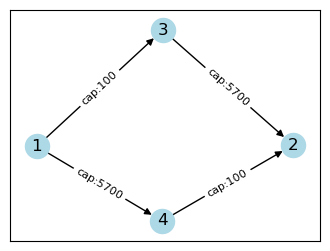

In [10]:
draw_network(link0)

Draw the network of s1:

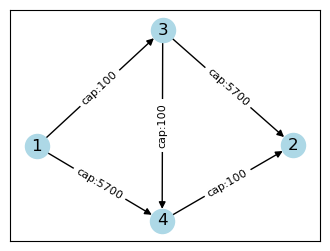

In [11]:
link1 = link[link['lanes_s1']!=0]
draw_network(link1)

In scenario 0, the network contains 4 nodes and 4 links, and the traffic demand from origin (node 1) to destination (node 2) is 4000.<br>
And in scenario 1, it opens up a new link:3->4.<br>
> Also, in dataset 03, the comparison of these two scenarios can help you validate Braess's Paradox.

## 2.The main programme
After preparing the data, you can run the DTA module of path4GMNS, which is called in a very simple way as shown below.<br>
To make the programme work properly, you only need to check the data format according to the user-guide document of DTALite, and you do not need to provide any additional parameters.

In [12]:
cd .\03_multi_scenario\minimum_input

C:\Users\Lenovo\path4GMNS_tutorial\03_multi_scenario\minimum_input


In [13]:
pg.run_DTALite()


DTALite run starts

DTALite run completes!


In [14]:
!cd

C:\Users\Lenovo\path4GMNS_tutorial\03_multi_scenario\minimum_input


You can ensure that the program is running correctly by outputting a list of files in the current directory (the directory where pg.dtaapi.run_DTALite is running) and comparing it to the reference output provided by the DTA-user-guide documentation.

In [15]:
files = os.listdir('.')
files

['choice_set_output_0_no_built.csv',
 'choice_set_output_1_build.csv',
 'demand.csv',
 'demand_file_list.csv',
 'demand_period.csv',
 'departure_time_profile.csv',
 'district_performance_s0_no_built.csv',
 'district_performance_s1_build.csv',
 'dynamic_traffic_management.csv',
 'final_summary.csv',
 'link.csv',
 'link_performance_s0_no_built.csv',
 'link_performance_s1_build.csv',
 'link_performance_summary.csv',
 'link_performance_summary_2way.csv',
 'link_type.csv',
 'log_DTA.txt',
 'log_label_correcting.txt',
 'log_main.txt',
 'log_scenario.txt',
 'log_shortest_path_tree.csv',
 'log_simulation.txt',
 'log_subarea_focusing.txt',
 'log_traffic_assignment.csv',
 'model_link.csv',
 'model_node.csv',
 'mode_type.csv',
 'node.csv',
 'od_performance_summary.csv',
 'route_assignment_s0_no_built.csv',
 'route_assignment_s1_build.csv',
 'scenario_index_list.csv',
 'sensor_data.csv',
 'settings.csv',
 'subarea.csv',
 'system_performance_summary.csv',
 'zonal_hierarchy_mapping.csv']

## 3.Results
### a. Route assignment results
This result is output by the programme in route_assignment_[scenarioname].csv. This part presents the feasible routes between the OD pairs, the traffic assignment of each route after DTA, and other data such as route passing time.

In [16]:
route_assignment_s0 = pd.read_csv('route_assignment_s0_no_built.csv')
route_assignment_s0

,first_column,route_seq_id,o_zone_id,d_zone_id,o_super_zone_index,d_super_zone_index,od_pair_key,information_type,mode_type,demand_period,...,sequential_link_delay,sequential_link_FFTT,DTM_OD_impact,DTM_path_impact,DTM_#_of_lane_closure_links,DTM_new_path_generated,DTM_volume_before,DTM_volume_after,DTM_volume_diff,
NaN,1,1,2,0,1,1->2,0,auto,am,3000.0001,...,0.010;45.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2,1,2,0,1,1->2,0,auto,am,1000.0000,...,45.000;0.010;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
def corr(route_s):
    """
    The original document has a line first_column, which may cause data misalignment merger.
    Here is to fix the problem of misalignment 
    route_s : the raw route_assignment data of different scenarios
    """
    
    col=list(route_s.columns)
    col.remove('first_column')
    col.append('last')
    dic=dict(zip(list(route_s.columns),col))
    route=route_s.rename(columns=dic)
    return route

Corrected route result:(before do this, you must check the assignment files to see if it dose indeed have the previously mentioned error)

In [18]:
route_s0 = corr(route_assignment_s0)
route_s0

,route_seq_id,o_zone_id,d_zone_id,o_super_zone_index,d_super_zone_index,od_pair_key,information_type,mode_type,demand_period,volume,...,sequential_link_FFTT,DTM_OD_impact,DTM_path_impact,DTM_#_of_lane_closure_links,DTM_new_path_generated,DTM_volume_before,DTM_volume_after,DTM_volume_diff,,last
NaN,1,1,2,0,1,1->2,0,auto,am,3000.0001,...,0.010;45.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2,1,2,0,1,1->2,0,auto,am,1000.0000,...,45.000;0.010;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
route_assignment_s1 = pd.read_csv('route_assignment_s1_build.csv')
route_s1 = corr(route_assignment_s1)
route_s1

,route_seq_id,o_zone_id,d_zone_id,o_super_zone_index,d_super_zone_index,od_pair_key,information_type,mode_type,demand_period,volume,...,sequential_link_FFTT,DTM_OD_impact,DTM_path_impact,DTM_#_of_lane_closure_links,DTM_new_path_generated,DTM_volume_before,DTM_volume_after,DTM_volume_diff,,last
NaN,1,1,2,0,1,1->2,0,auto,am,4000.0001,...,0.010;0.010;0.010;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter the data by column name to see the more intuitive and critical part of the route results. This part presents the node sequence and link sequence of each route, as well as the traffic flow volume that passes on each route. It can be seen that 1000 (25%) of the traffic passes over the 1-4-2 route, while the remaining 3000 passes over the 1-3-2 route.

In scenario 0, the travel times for users on two routes are both 55. And the combined flow on both paths is 4000.

In [20]:
route_s0[['route_seq_id','od_pair_key','volume','travel_time','node_sequence','link_id_sequence']]

,route_seq_id,od_pair_key,volume,travel_time,node_sequence,link_id_sequence
NaN,1,1->2,3000.0001,55.0,1;3;2;,1003;3002;
NaN,2,1->2,1000.0000,55.0,1;4;2;,1004;4002;


In scenario s1, users only choose path 1->3->4->2 with a travel time of 80 and a flow of 4000.

In [21]:
route_s1[['route_seq_id','od_pair_key','volume','travel_time','node_sequence','link_id_sequence']]

,route_seq_id,od_pair_key,volume,travel_time,node_sequence,link_id_sequence
NaN,1,1->2,4000.0001,20.01,1;3;4;2;,1003;4002;4002;


> By comparing the two scenarios, we can observe that after constructing a new road, the travel time for users actually increases. It is because when each user "selfishly" chooses their own path, adding additional capacity to the network can paradoxically decrease overall performance. This  is the phenomenon described as the Braess Paradox.

### b. Link assignment results
This result is output by the program in link_assignment_[scenarioname].csv, presenting the assignment on the link.

In [22]:
link_performance_s0 = pd.read_csv('link_performance_s0_no_built.csv')
link_performance_s0

,link_seq_id,link_id,vdf_type,from_node_id,to_node_id,lanes,distance_km,distance_mile,fftt,meso_link_id,...,DTM_speed_before,DTM_speed_after,DTM_speed_diff,DTM_DoC_before,DTM_DoC_after,DTM_Doc_diff,DTM_P_before,DTM_P_after,DTM_P_diff,notes
0,1,1003,bpr,1,3,1.0,0.01,0.006215,0.01,-1,...,0.06,0.0,-0.06,9.990,0.0,-9.990,13.215,0.0,-13.215,period-based
1,2,3002,bpr,3,2,3.0,45.00,27.967682,45.00,-1,...,60.00,0.0,-60.00,0.175,0.0,-0.175,0.168,0.0,-0.168,period-based
2,3,1004,bpr,1,4,3.0,45.00,27.967682,45.00,-1,...,60.00,0.0,-60.00,0.058,0.0,-0.058,0.056,0.0,-0.056,period-based
3,4,4002,bpr,4,2,1.0,0.01,0.006215,0.01,-1,...,0.06,0.0,-0.06,9.990,0.0,-9.990,13.215,0.0,-13.215,period-based
4,5,4002,bpr,3,4,0.0,0.01,0.006215,0.01,-1,...,60.00,0.0,-60.00,0.000,0.0,0.000,-1.000,0.0,1.000,period-based


In [23]:
link_performance_s0[['link_id','from_node_id','to_node_id','volume']]

,link_id,from_node_id,to_node_id,volume
0,1003,1,3,3000.0
1,3002,3,2,3000.0
2,1004,1,4,1000.0
3,4002,4,2,1000.0
4,4002,3,4,0.0


Since link3->4 is not opened, the traffic volume on it is 0.

In [24]:
link_performance_s1 = pd.read_csv('link_performance_s1_build.csv')
link_performance_s1

,link_seq_id,link_id,vdf_type,from_node_id,to_node_id,lanes,distance_km,distance_mile,fftt,meso_link_id,...,DTM_speed_before,DTM_speed_after,DTM_speed_diff,DTM_DoC_before,DTM_DoC_after,DTM_Doc_diff,DTM_P_before,DTM_P_after,DTM_P_diff,notes
0,1,1003,bpr,1,3,1.0,0.01,0.006215,0.01,-1,...,0.06,0.0,-0.06,9.99,0.0,-9.99,13.215,0.0,-13.215,period-based
1,2,3002,bpr,3,2,3.0,45.00,27.967682,45.00,-1,...,60.00,0.0,-60.00,0.00,0.0,0.00,0.000,0.0,0.000,period-based
2,3,1004,bpr,1,4,3.0,45.00,27.967682,45.00,-1,...,60.00,0.0,-60.00,0.00,0.0,0.00,0.000,0.0,0.000,period-based
3,4,4002,bpr,4,2,1.0,0.01,0.006215,0.01,-1,...,0.06,0.0,-0.06,9.99,0.0,-9.99,13.215,0.0,-13.215,period-based
4,5,4002,bpr,3,4,3.0,0.01,0.006215,0.01,-1,...,60.00,0.0,-60.00,9.99,0.0,-9.99,13.215,0.0,-13.215,period-based


In [25]:
link_performance_s1[['link_id','from_node_id','to_node_id','volume']]

,link_id,from_node_id,to_node_id,volume
0,1003,1,3,4000.0
1,3002,3,2,0.0
2,1004,1,4,0.0
3,4002,4,2,4000.0
4,4002,3,4,4000.0


With the link_performance file and network files(link.csv and node.csv), you can use the following code to get the network with assignment flow result on link.

In [26]:
def draw_res(link_s,link_performance_s):
    """
        link_s : the link data of different scenarios
        link_performance_s : the link_perfomance data of different scenarios
    """
    gnode = list(node['node_id'])
    glink = list(zip(link_s['from_node_id'],link_s['to_node_id']))
    G = nx.DiGraph()           # grapgh object
    G.add_nodes_from(gnode)
    G.add_edges_from(glink)

    coordinates = np.array(list(zip(node['x_coord'],node['y_coord'])))
    npos = dict(zip(gnode,coordinates))  # Get the mapping relationship between nodes and coordinates, represented as a dictionary
    nlabels = dict(zip(gnode, gnode))
    edge_labels = dict(zip(glink, list(link_performance_s['volume'])))

    nx.draw_networkx_nodes(G, npos, node_color="lightblue")  # draw the nodes
    nx.draw_networkx_edges(G, npos, glink)  # draw the edges(links)
    nx.draw_networkx_labels(G, npos, nlabels)  # add labels
    nx.draw_networkx_edge_labels(G, npos, edge_labels=edge_labels) # show the assignment flow result
    plt.rcParams['figure.figsize']= (4, 3) 

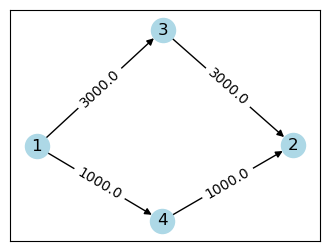

In [27]:
draw_res(link0,link_performance_s0)

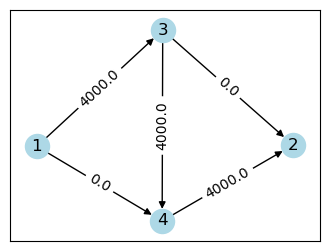

In [28]:
draw_res(link1,link_performance_s1)

### c. Summary of results
The program outputs various items such as runtime information, assignment results, and system performance to the final_summary.csv file, through which you can get the complete results of each part of the program. 
>However, it is not a strictly legal excel file, so it is recommended to check the final_summary.csv file directly when you need it, rather than reading it through the program.

In [29]:
col_names=[str(i) for i in range(12)]
data = pd.read_csv('final_summary.csv',header=None,names=col_names)

In [30]:
display(data.to_string()) # You can take this approach if you want to see the full table, but it's rather unintuitive

'                                                                                                                                         0                                                                                                                                        1                                                    2                      3                                   4                   5                    6                    7                               8               9                 10                   11\n0                                                                                   [PROCESS INFO] Step 0: reading scenario_index_list.csv                                                                                                                                      NaN                                                  NaN                    NaN                                 NaN                 NaN                  NaN                  NaN           